> 번역: [박찬성](https://github.com/deep-diver)<br><br>
> 객체지향 방식을 사용한 버전은 Jehyun Lee 님의 [블로그](https://jehyunlee.github.io/2020/04/21/Python-DS-10-matplotlib_Tools/)를 참고하세요.

**도구 - matplotlib**

*이 노트북은 matplotlib 라이브러리를 사용하여 아름다운 그래프를 그리는 방법을 보여줍니다.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/tools_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 목차
 <p><div class="lev1"><a href="#Plotting-your-first-graph-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>처음으로 그려보는 그래프</a></div><div class="lev1"><a href="#Line-style-and-color-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>선의 스타일과 색상</a></div><div class="lev1"><a href="#Saving-a-figure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>그림의 저장</a></div><div class="lev1"><a href="#Subplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>부분 그래프</a></div><div class="lev1"><a href="#Multiple-figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>여러개의 그림</a></div><div class="lev1"><a href="#Pyplot's-state-machine:-implicit-vs-explicit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pyplot의 상태 머신: 암시적 <em>vs</em> 명시적 </a></div><div class="lev1"><a href="#Pylab-vs-Pyplot-vs-Matplotlib-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pylab <em>vs</em> Pyplot <em>vs</em> Matplotlib</a></div><div class="lev1"><a href="#Drawing-text-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>텍스트 그리기</a></div><div class="lev1"><a href="#Legends-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>범례 (Legends)</a></div><div class="lev1"><a href="#Non-linear-scales-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>비선형 척도 (Non linear scales)</a></div><div class="lev1"><a href="#Ticks-and-tickers-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>틱과 티커 (Ticks and tickers)</a></div><div class="lev1"><a href="#Polar-projection-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>극좌표계 투영 (Polar projection)</a></div><div class="lev1"><a href="#3D-projection-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>3차원 투영</a></div><div class="lev1"><a href="#Scatter-plot-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>산점도</a></div><div class="lev1"><a href="#Lines-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>선</a></div><div class="lev1"><a href="#Histograms-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>히스토그램</a></div><div class="lev1"><a href="#Images-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>이미지</a></div><div class="lev1"><a href="#Animations-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>애니메이션</a></div><div class="lev1"><a href="#Saving-animations-to-video-files-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>애니메이션을 비디오로 저장</a></div><div class="lev1"><a href="#What-next?-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>다음은 무엇을 해야할까?</a></div>

# 처음으로 그려보는 그래프

우선은 `matplotlib` 라이브러리를 임포트 해줘야 합니다.

In [1]:
import matplotlib

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib 

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

그러면 첫 번째 그래프를 그려보겠습니다! :)

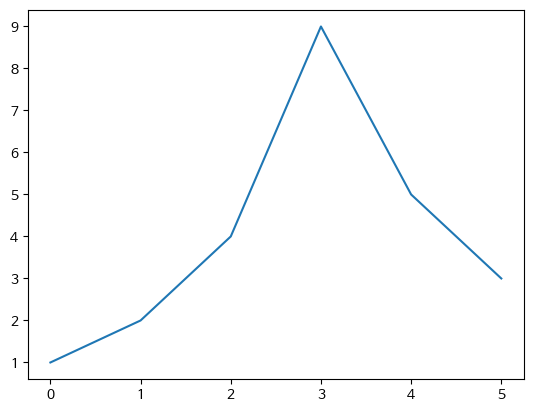

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

그렇습니다. 데이터 몇 개로 `plot` 함수를 호출한 다음, `show` 함수를 호출해주면 간단히 그래프를 그려볼 수 있습니다!

**노트**:

> 맷플롯립은 Tk, wxPython 등과 같은 다양한 백엔드 그래픽 라이브러리를 사용하여 그래프를 출력할 수 있습니다. 명령줄에서 파이썬을 실행할 때, 맷플롯립을 임포트한 다음 그래프를 그리기 전에 어떤 백엔드를 사용할지 지정할 수 있습니다. 예를 들어, Tk 백엔드를 사용하려면 `matplotlib.use("TKAgg")`를 실행합니다.
> 하지만 주피터 노트북에서 `import matplotlib.pyplot`을 임포트하면 주피터 자체가 자동으로 백엔드로 등록되어 노트북 내에서 그래프가 바로 표시됩니다. 이전에는 `%matplotlib inline`을 실행해야 했기 때문에 일부 노트북에서는 여전히 이런 코드가 있지만, 더 이상 필요하지 않습니다.

`plot` 함수에 단일 배열의 데이터가 주어진다면, 수직 축의 좌표로서 이를 사용하게 되며, 각 데이터의 배열상 색인(인덱스)을 수평 좌표로서 사용합니다.
두 개의 배열을 넣어줄 수도 있습니다: 그러면, 하나는 `x` 축에 대한 것이며, 다른 하나는 `y` 축에 대한 것이 됩니다:

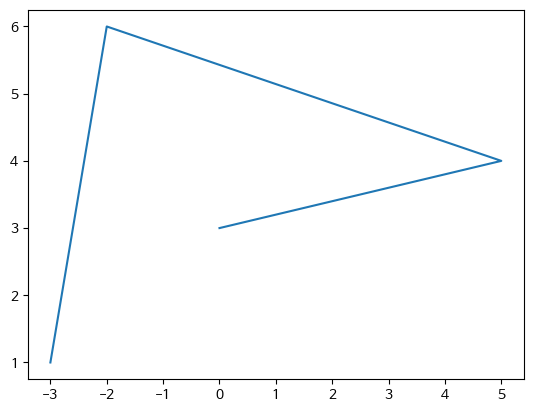

In [3]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

축은 자동으로 데이터에 가능한한 맞춰집니다. 그래프가 답답해 보여서 약간의 공간을 더 주고 싶기도 할 것인데, 이 때는 `axis` 함수를 호출하여 각 축의 범위 `[xmin, xmax, ymin, ymax]`를 확장할 수도 있습니다.

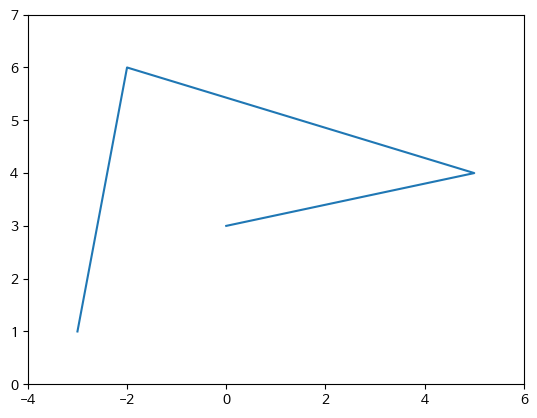

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

이번에는 수학 함수를 그려보겠습니다. NumPy의 `linespace` 함수를 사용하여 -2 ~ 2 범위에 속하는 500개의 부동소수로 구성된 `x` 배열을 생성합니다. 그 다음 `x`의 각 값의 거듭제곱된 값을 포함하는 `y` 배열을 생성합니다 (NumPy에 대하여 좀 더 알고 싶다면, [NumPy 튜토리얼](tools_numpy.ipynb)을 참고하시기 바랍니다).

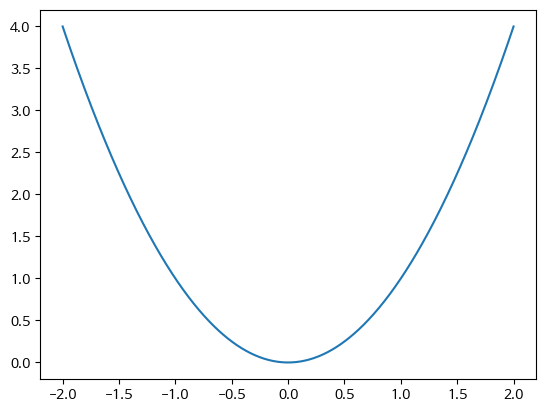

In [5]:
import numpy as np

x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

그래프가 약간은 삭막해 보입니다. 타이틀과 x 및 y축에 대한 라벨, 그리고 모눈자를 추가적으로 그려보겠습니다.

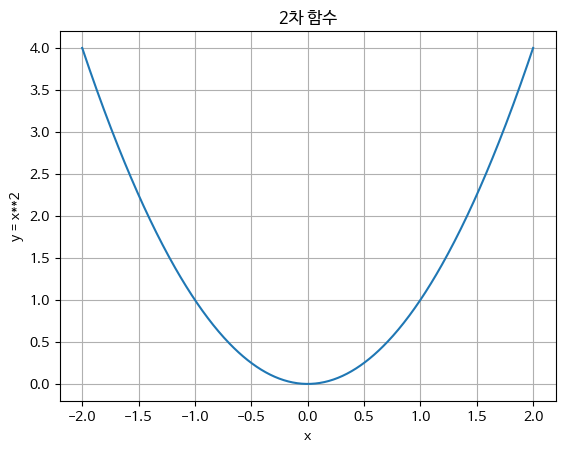

In [6]:
plt.plot(x, y)
plt.title("2차 함수")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

# 선의 스타일과 색상

기본적으로 맷플롯립은 바로 다음에 위치한(연이은) 데이터 사이에 선을 그립니다.

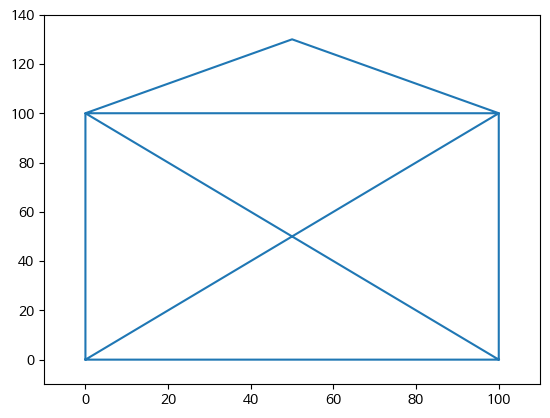

In [7]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], 
         [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

세 번째 파라미터를 지정하면 선의 스타일과 색상을 바꿀 수 있습니다. 예를 들어서 `"g--"`는 "초록색 파선"을 의미합니다.

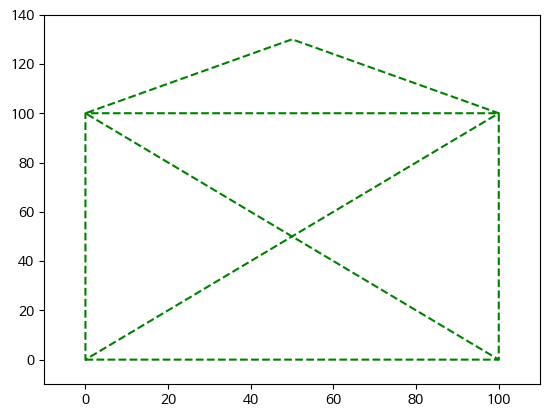

In [8]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], 
         [0, 0, 100, 100, 0, 100, 130, 100, 0], 
         "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

`x1, y1, [스타일1], x2, y2, [스타일2], ...` 와 같은 방식으로, 하나의 그래프에 여러개의 선과 각 선의 스타일을 간단히 그려볼 수 있습니다.

예를 들어 아래와 같이 말이죠:

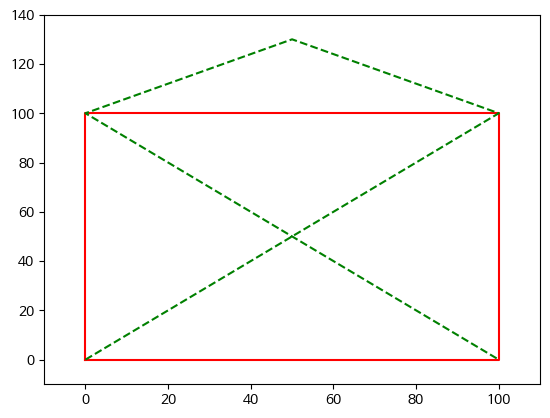

In [9]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-", 
         [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

또는 `show`를 호출하기 전 `plot`을 여러번 호출해도 가능합니다.

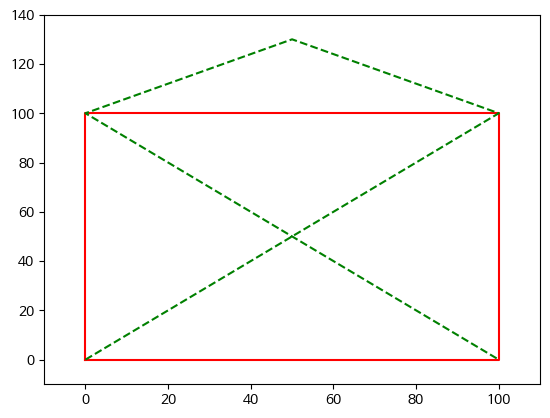

In [10]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

선 대신에 간단한 점을 그려보는 것도 가능합니다. 아래는 초록색 파선, 빨강 점선, 파랑 삼각형의 예를 보여줍니다. [공식 문서](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)에서 사용 가능한 스타일 및 색상의 모든 옵션을 확인해 볼 수 있습니다.

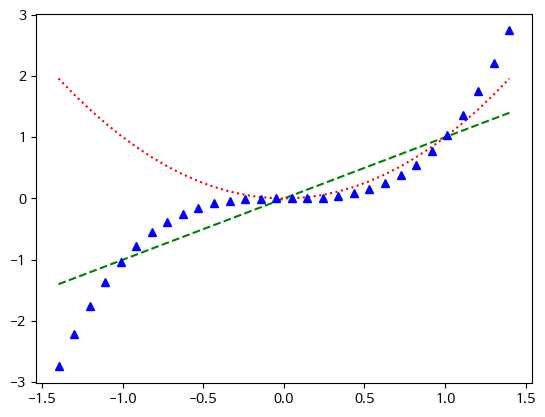

In [11]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

`plot` 함수는 `Line2D`객체로 구성된 리스트를 반환합니다 (각 객체가 각 선에 대응됩니다). 이 선들에 대한 추가적인 속성을 설정할 수도 있습니다. 가령 선의 두께, 스타일, 투명도 같은것의 설정이 가능합니다. [공식 문서](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties)에서 설정 가능한 모든 속성을 확인해볼 수 있습니다.

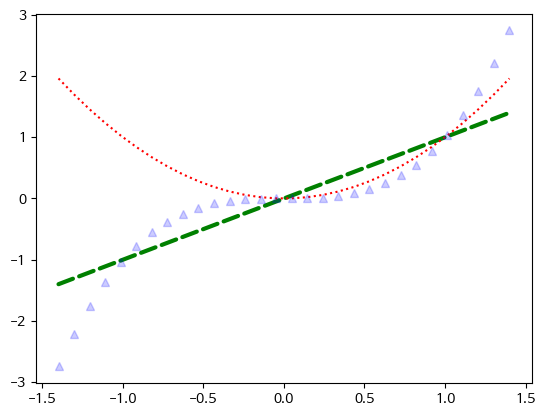

In [12]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

# 그림의 저장
그래프를 그림파일로 저장하는 방법은 간단합니다. 단순히 파일이름을 지정하여 [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) 함수를 호출해 주기만 하면 됩니다. 가능한 이미지 포맷은 사용하는 그래픽 백엔드에 따라서 지원 여부가 결정됩니다.

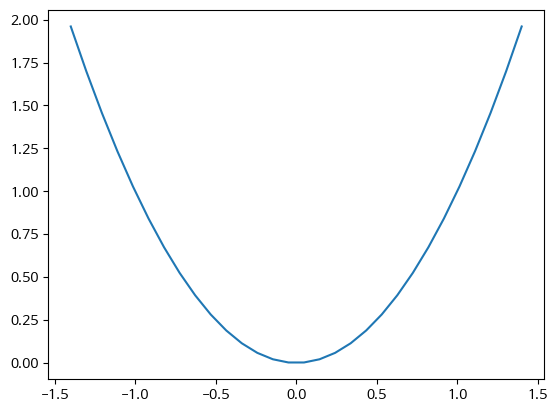

In [13]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)

# 부분 그래프 (subplot)

맷플롯립은 하나의 그림(figure)에 여러개의 부분 그래프를 포함할 수 있습니다. 이 부분 그래프는 격자 형식으로 관리됩니다. `subplot` 함수를 호출하여 부분 그래프를 생성할 수 있습니다. 이 때 격자의 행/열의 수 및 그래프를 그리고자 하는 부분 그래프의 색인을 파라미터로서 지정해줄 수 있습니다 (색인은 1부터 시작하며, 좌->우, 상단->하단의 방향입니다). pyplot은 현재 활성화된 부분 그래프를 계속해서 추적합니다 (`plt.gca()`를 호출하여 해당 부분 그래프의 참조를 얻을 수 있습니다). 따라서, `plot` 함수를 호출할 때 *활성화된* 부분 그래프에 그림이 그려지게 됩니다.

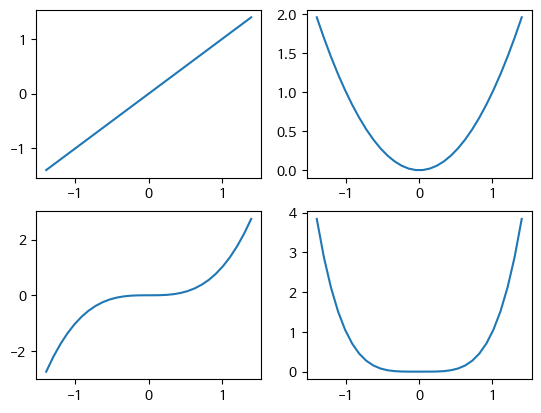

In [14]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 행 2 열 크기의 격자 중 첫 번째 부분 그래프 = 좌측 상단
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 행 2 열 크기의 격자 중 두 번째 부분 그래프 = 우측 상단
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 행 2 열 크기의 격자 중 세 번째 부분 그래프 = 좌측 하단
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 행 2 열 크기의 격자 중 네 번째 부분 그래프 = 우측 하단
plt.plot(x, x**4)
plt.show()

* `subplot(223)`은 `subplot(2, 2, 3)`의 축약입니다.

격자의 여러 영역으로 확장된 부분 그래프를 생성하는 것도 쉽습니다:

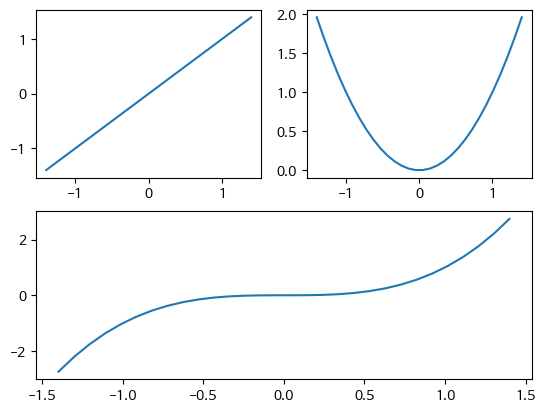

In [15]:
plt.subplot(2, 2, 1)  # 2 행 2 열 크기의 격자 중 첫 번째 부분 그래프 = 좌측 상단
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 행 2 열 크기의 격자 중 두 번째 부분 그래프 = 우측 상단
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2행 *1* 열의 두 번째 부분 그래프 = 하단
plt.plot(x, x**3)
plt.show()

보다 복잡한 부분 그래프의 위치 선정이 필요하다면, `subplot2grid`를 대신 사용할 수 있습니다. 격자의 행과 열의 번호 및 격자에서 해당 부분 그래프를 그릴 위치를 지정해줄 수 있습니다 (좌측상단 = (0,0). 또한 몇 개의 행/열로 확장되어야 하는지도 추가적으로 지정할 수 있습니다. 아래는 그에대한 예를 보여줍니다:

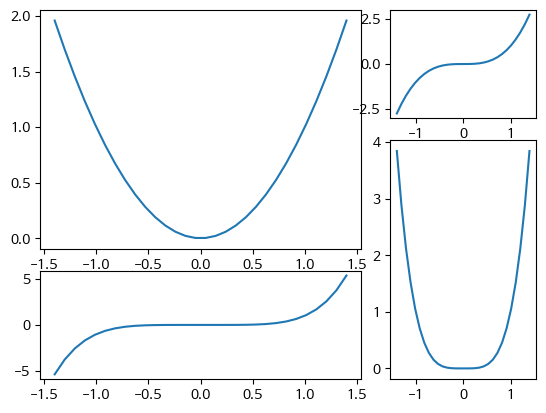

In [16]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

보다 유연한 부분그래프 위치선정이 필요하다면, [GridSpec 문서](http://matplotlib.org/users/gridspec.html)를 확인해 보시길 바랍니다.

# 여러개의 그림 (figure)
여러개의 그림을 그리는것도 가능합니다. 각 그림은 하나 이상의 부분 그래프를 가질 수 있습니다. 기본적으로는 matplotlib이 자동으로 `figure(1)`을 생성합니다. 그림간 전환을 할 때, pyplot은 현재 활성화된 그림을 계속해서 추적합니다 (이에대한 참조는 `plt.gcf()`의 호출로 알 수 있습니다). 또한 활성화된 그림의 활성화된 부분 그래프가 현재 그래프가 그려질 부분 그래프가 됩니다.

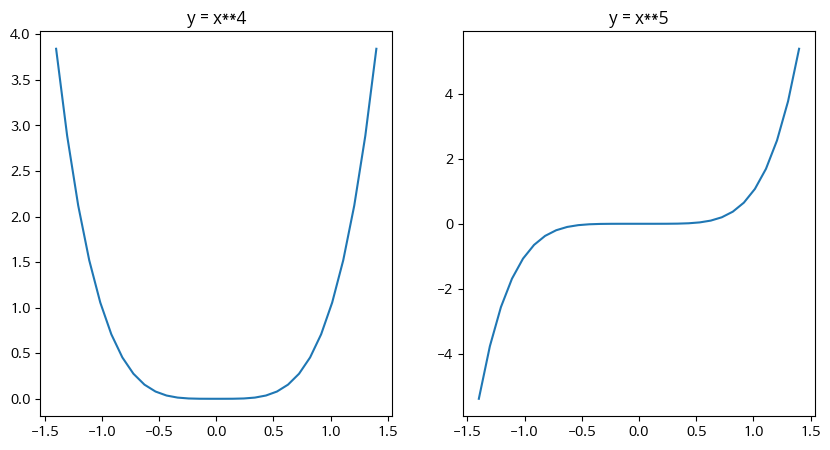

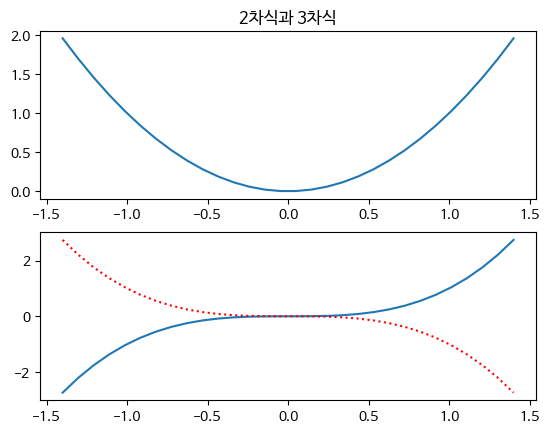

In [17]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("2차식과 3차식")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # 그림 1로 돌아가며, 활성화된 부분 그래프는 212 (하단)이 됩니다
plt.plot(x, -x**3, "r:")

plt.show()

# Pyplot의 상태 머신: 암시적 *vs* 명시적
지금까지 현재의 활성화된 부분 그래프를 추적하는 Pyplot의 상태 머신을 사용했었습니다. `plot` 함수를 호출할 때마다 pyplot은 단지 현재 활성화된 부분 그래프에 그림을 그립니다. 그리고 `plot` 함수를 호출 할 때, 그림 및 부분 그래프가 아직 존재하지 않는다면 이들을 만들어내는 마법같은(?) 작업도 일부 수행합니다. 이는 주피터와 같은 대화식의 환경에서 편리합니다.

그러나 프로그램을 작성하는 것이라면, *명시적인 것이 암시적인것 보다 더 낫습니다*. 명시적인 코드는 일반적으로 디버깅과 유지보수가 더 쉽습니다. 이 말에 동의하지 않는다면, 파이썬 젠(Zen)의 두 번째 규칙을 읽어보시기 바랍니다.

In [18]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


> 아름다움이 추한 것보다 낫다.<br>
> 명확함이 함축된 것보다 낫다.<br>
> 단순함이 복잡한 것보다 낫다.<br>
> 복잡함이 난해한 것보다 낫다.<br>
> 단조로움이 중접된 것보다 낫다.<br>
> 여유로움이 밀집된 것보다 낫다.<br>
> 가독성은 중요하다.<br>
> 비록 실용성이 이상을 능가한다 하더라도 규칙을 깨야할 정도로 특별한 경우란 없다.<br>
> 알고도 침묵하지 않는 한 오류는 결코 조용히 지나가지 않는다.<br>
> 모호함을 마주하고 추측하려는 유혹을 거절하라. 비록 당신이 우둔해서 처음에는 명백해 보이지 않을 수도 있겠지만 문제를 해결할 하나의 - 바람직하고 유일한 - 명백한 방법이 있을 것이다.<br>
> 비록 하지않는 것이 지금 하는 것보다 나을 때도 있지만 지금 하는 것이 전혀 안하는 것보다 낫다.<br>
> 설명하기 어려운 구현이라면 좋은 아이디어가 아니다. 쉽게 설명할 수 있는 구현이라면 좋은 아이디어일 수 있다. 네임스페이스는 정말 대단한 아이디어다. -- 자주 사용하자!<br>
>
> from [출처](https://wikidocs.net/7907)

다행히도 Pyplot은 상태 머신을 완전히 무시할 수 있게끔 해 줍니다. 따라서 아름다운 명시적 코드를 작성하는것이 가능하죠. 간단히 `subplots` 함수를 호출해서 반환되는 figure 객체 및 축의 리스트를 사용하면 됩니다. 마법은 더 이상 없습니다! 

아래는 이에 대한 예 입니다:

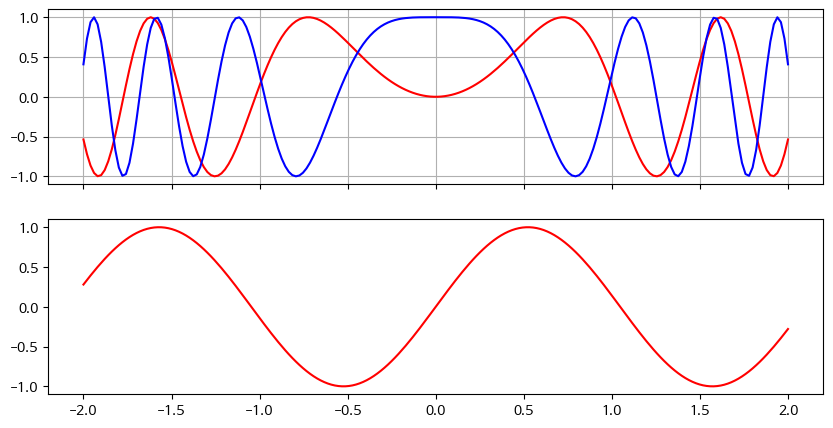

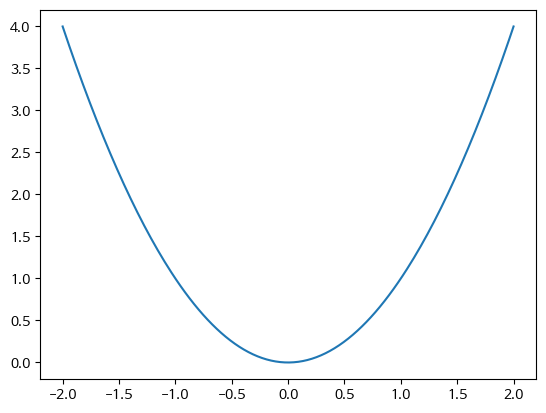

In [19]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

일관성을 위해서 이 튜토리얼의 나머지 부분에서는 pyplot의 상태 머신을 계속해서 사용할 것입니다. 그러나 프로그램에서는 객체지향 인터페이스의 사용을 권장하고 싶습니다.

# Pylab *vs* Pyplot *vs* Matplotlib

pylab, pyplot, matplotlib 간의 관계에대한 혼동이 있습니다. 그러나 이들의 관계는 매우 단순합니다: matplotlib은 완전한 라이브러리이며, pylab 및 pyplot을 포함한 모든것을 가지고 있습니다.

Pyplot은 그래프를 그리기위한 다양한 도구를 제공합니다. 여기에는 내부적인 객체지향적인 그래프 그리기 라이브러리에 대한 상태 머신 인터페이스도 포함됩니다.

Pylab은 mkatplotlib.pyplot 및 NumPy를 단일 네임스페이스로 임포트하는 편리성을 위한 모듈입니다. 인터넷에 떠도는 pylab을 사용하는 여러 예제를 보게 될 것입니다. 그러나 이는 더이상 권장되는 사용방법은 아닙니다 (왜냐하면 *명시적*인 임포트가 *암시적인*것 보다 더 낫기 때문입니다).

# 텍스트 그리기
`text` 함수를 호출하여 텍스트를 그래프의 원하는 위치에 추가할 수 있습니다. 출력을 원하는 텍스트와 수평 및 수직 좌표를 지정하고, 추가적으로 몇 가지 속성을 지정해 주기만 하면 됩니다. 맷플롯립의 모든 텍스트는 TeX 방정식 표현을 포함할 수 있습니다. 더 자세한 내용은 [공식 문서](http://matplotlib.org/users/mathtext.html)를 참조하시기 바랍니다.

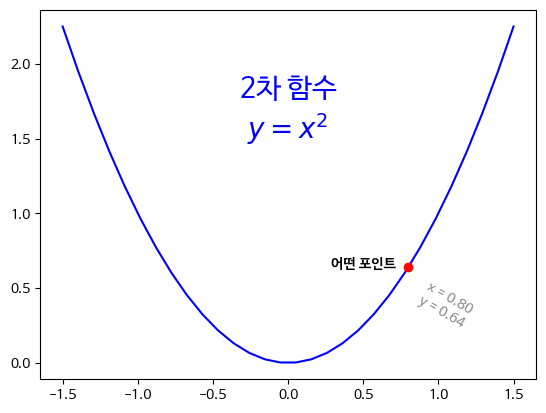

In [20]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "2차 함수\n$y = x^2$", fontsize=20, color='blue', 
         horizontalalignment="center")
plt.text(px - 0.08, py, "어떤 포인트", ha="right", weight="heavy")
plt.text(px + 0.05, py - 0.4, "x = %0.2f\ny = %0.2f"%(px, py), rotation=-30, 
         color='gray')

plt.show()

* 알아둘 것: `ha`는 `horizontalalignment(수평정렬)`의 이명 입니다.

더 많은 텍스트 속성을 알고 싶다면, [공식 문서](http://matplotlib.org/users/text_props.html#text-properties)를 참조하시기 바랍니다.

아래 그래프의 "어떤 포인트" 같은 텍스트 처럼, 그래프의 요소에 주석을 다는것은 꽤 흔한 일입니다. `annotate` 함수는 이를 쉽게 할 수 있게 해 줍니다: 관심있는 부분의 위치를 지정하고, 텍스트의 위치를 지정합니다. 그리고 텍스트 및 화살표에 대한 추가적인 속성도 지정해줄 수 있습니다.

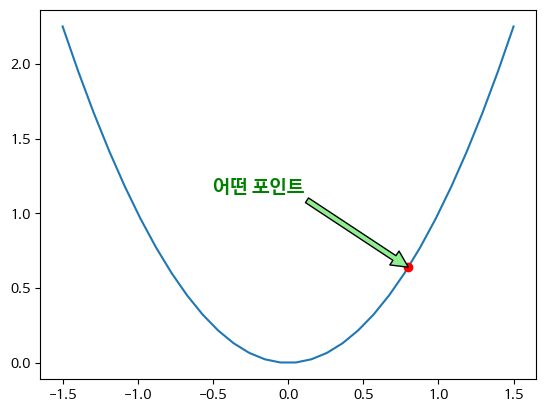

In [21]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("어떤 포인트", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

`bbox` 속성을 사용하면, 텍스트를 포함하는 사각형을 그려볼 수도 있습니다:

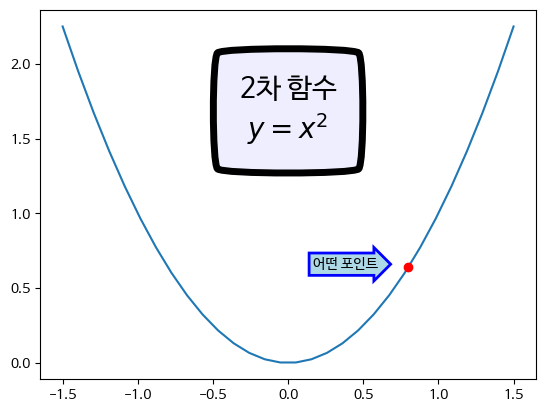

In [22]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "어떤 포인트", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", 
                  fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "2차 함수\n$y = x^2$", fontsize=20, color='black', 
         ha="center", bbox=bbox_props)

plt.show()

재미를 위해서 [xkcd](http://xkcd.com) 스타일의 그래프를 그려보고 싶다면, `with plt.xkcd()` 섹션 블록을 활용할 수도 있습니다:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font fami

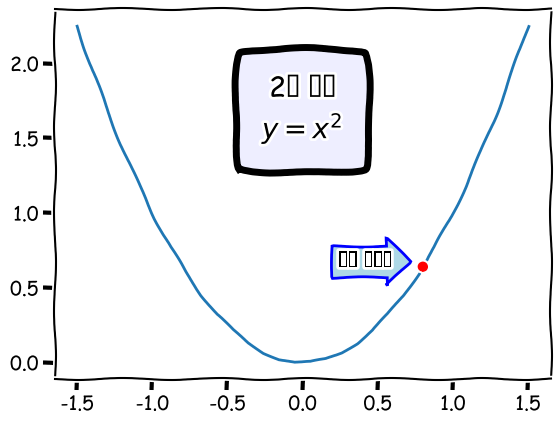

In [23]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "어떤 포인트", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", 
                      fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "2차 함수\n$y = x^2$", fontsize=20, color='black', 
             ha="center", bbox=bbox_props)

    plt.show()

# 범례 (Legends)

범례를 추가하는 가장 간단한 방법은 모든 선에 라벨을 설정 해 주고, `legend` 함수를 호출하는 것입니다.

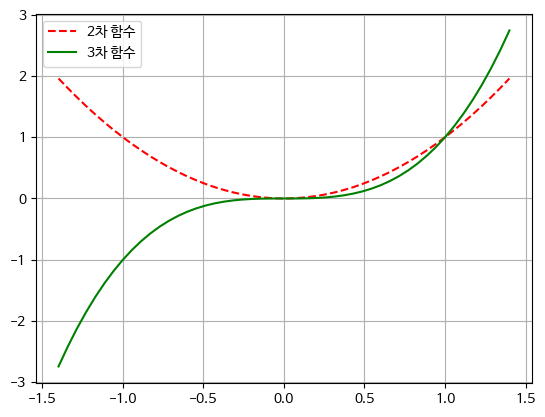

In [24]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="2차 함수")
plt.plot(x, x**3, "g-", label="3차 함수")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# 비선형 척도
Matplotlib은 로그, 로짓(logit)과 같은 비선형 척도를 지원합니다.

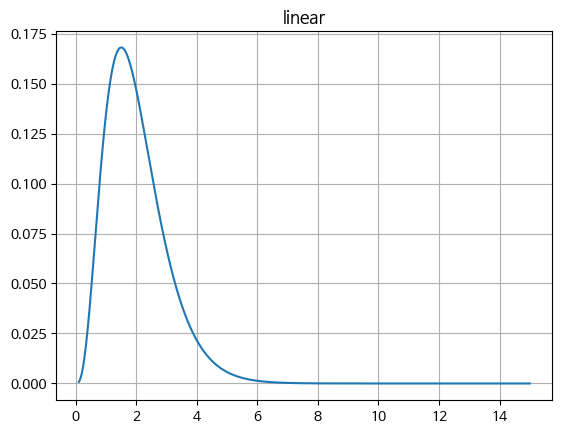

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


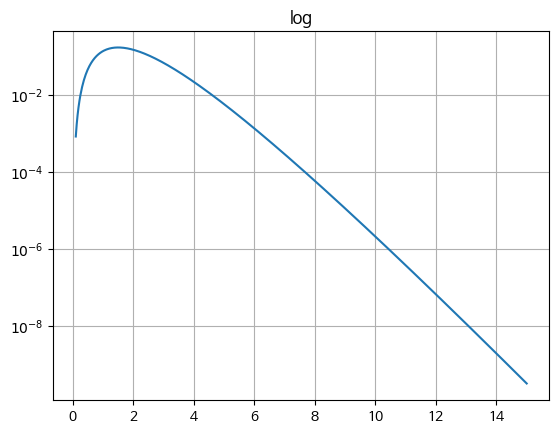

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


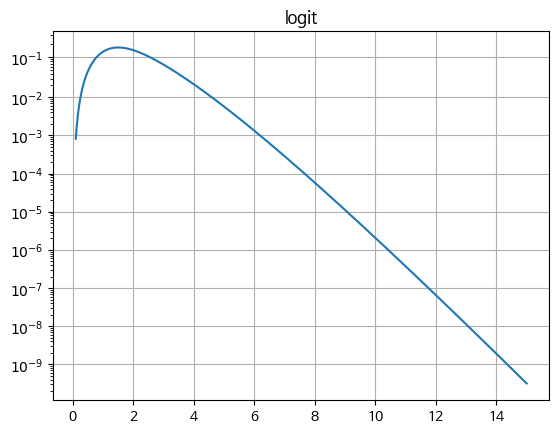

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


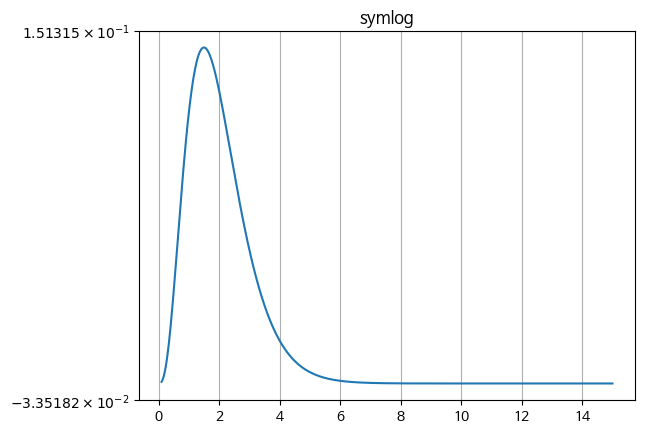

In [30]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yticks(fontname="Liberation Sans")
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.figure(3)
plt.plot(x, y)
plt.yticks(fontname="Liberation Sans")
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.figure(4)
plt.plot(x, y - y.mean())
plt.yticks(fontname="Liberation Sans")
plt.yscale('symlog', linthresh=0.05)
plt.title('symlog')
plt.grid(True)

plt.show()

# 틱과 틱커 (Ticks and tickers)

각 축에는 "틱(ticks)"이라는 작은 표시가 있습니다. 정확히 말하자면, "틱"은 표시(예. (-1, 0, 1))의 *위치*"이며, *틱 선*은 그 위치에 그려지는 작은 선입니다. 또한 "틱 라벨"은 틱 선 옆에 그려지는 라벨이며, "틱커"는 틱의 위치를 결정하는 객체 입니다. 기본적인 틱커는 ~5 에서 8 틱을 위치시키는데 꽤 잘 작동합니다. 즉, 틱 서로간에 적당한 거리를 표현합니다.

하지만, 가끔은 좀 더 이를 제어할 필요가 있습니다 (예. 위의 로짓 그래프에서는 너무 많은 틱 라벨이 있습니다). 다행히도 matplotlib은 틱을 완전히 제어하는 방법을 제공합니다. 심지어 보조 눈금(minor tick)을 활성화 할 수도 있습니다.


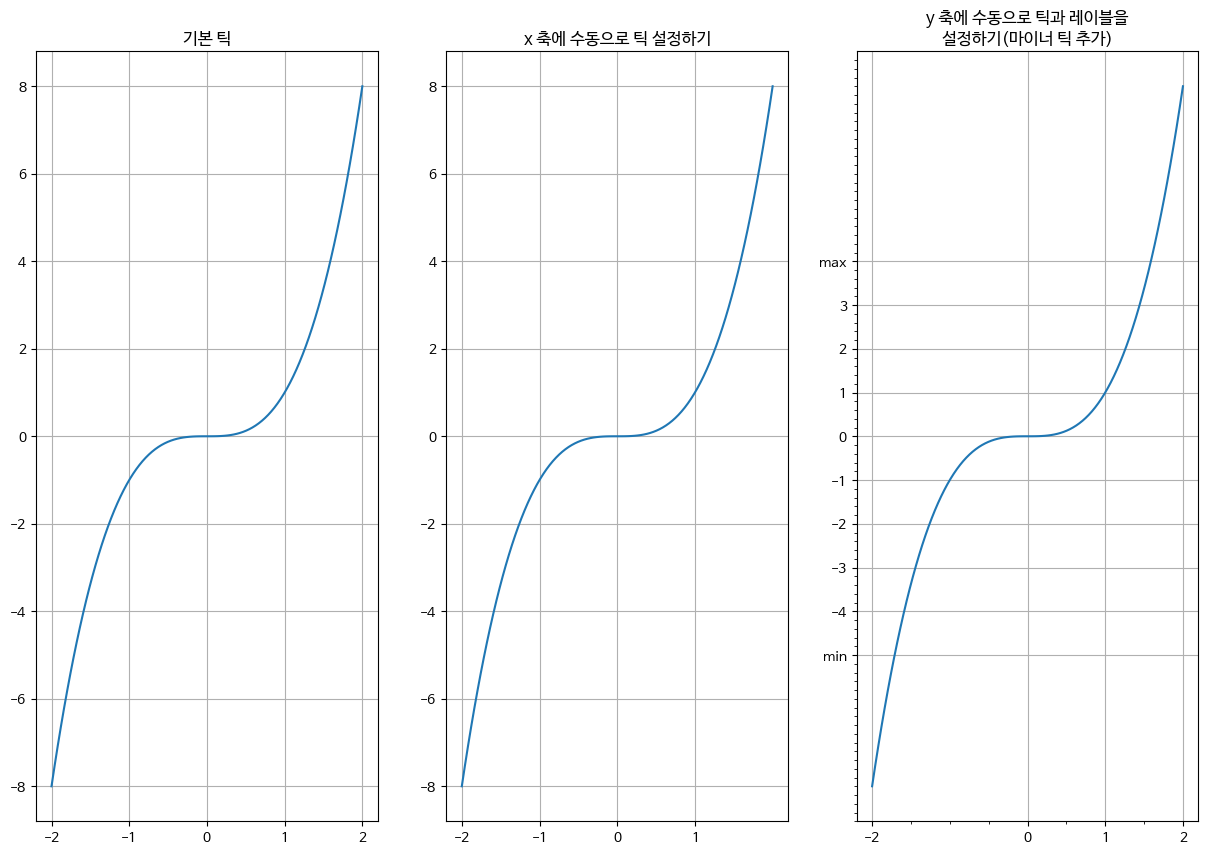

In [31]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("기본 틱")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("x 축에 수동으로 틱 설정하기")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom='off')
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.grid(True)
plt.title("y 축에 수동으로 틱과 레이블을\n설정하기(마이너 틱 추가)")

plt.show()

# 극좌표계의 투영 (Polar projection)

극좌표계 그래프를 그리는 것은 매우 간단합니다. 부분 그래프를 생성할 때 `projection` 속성을 `"polar"`로 설정해 주기만 하면 됩니다.

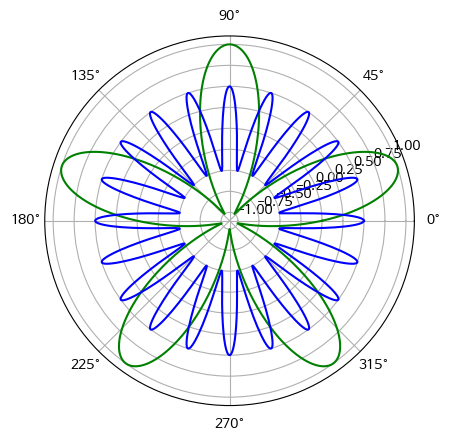

In [32]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111, projection='polar')
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

# 3차원 투영

3차원 그래프를 그리는것은 꽤 간단합니다. 부분 그래프를 만들 때 `projection` 속성을 `"3d"`로 설정하면 됩니다. 3D 축 객체를 반환합니다. 이 객체의 `plot_surface` 메서드를 호출할 때 x, y, z 좌표를 포함한 추가적이나 속성을 지정할 수 있습니다. 더 자세한 내용은 [맷플롯립 튜토리얼](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html)을 참고하세요.

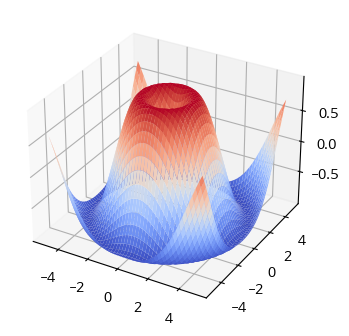

In [33]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1,
                                 cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

동일한 데이터를 출력하는 또 다른 방법은 등고선도(contour plot)를 *이용*하는 것입니다.

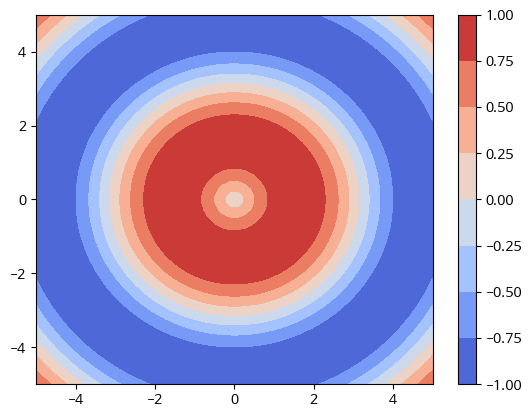

In [34]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

# 산점도(Scatter plot)

단순히 각 점에 대한 x 및 y 좌표를 제공하면 산점도를 그릴 수 있습니다.

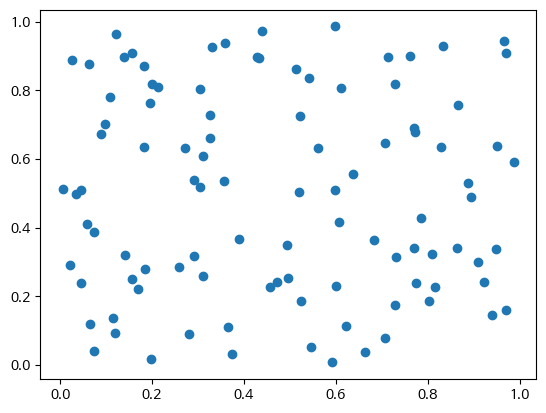

In [35]:
np.random.seed(42)  # 노트북 결과를 일정하게 만들기 위해

x, y = np.random.rand(2, 100)
plt.scatter(x, y)
plt.show()

부수적으로 각 점의 크기를 정할 수도 있습니다.

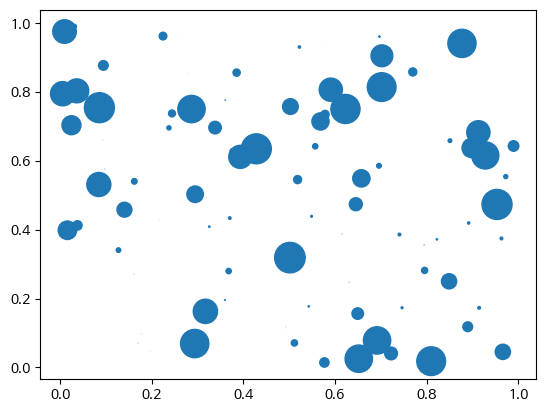

In [36]:
x, y, scale = np.random.rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

마찬가지로 여러 속성을 설정할 수 있습니다. 가령 테두리 및 모양의 내부 색상, 그리고 투명도와 같은것의 설정이 가능합니다.

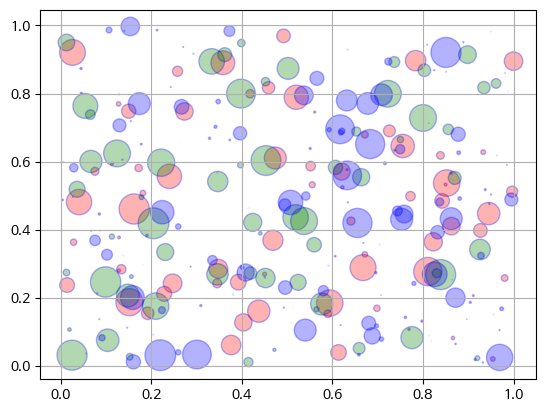

In [37]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = np.random.rand(2, n)
    scale = 500.0 * np.random.rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

# 선

지금까지 해온것 처럼 `plot` 함수를 사용하여 선을 그릴 수 있습니다. 하지만, 가끔은 그래프를 통과하는 무한한 선을 그리는 유틸리티 함수를 만들면 편리합니다 (기울기와 절편으로). 또한 `hlines` 및 `vlines` 함수를 사용하면, 아래와 같이 부분 수평 및 수직 선을 그릴 수도 있습니다:

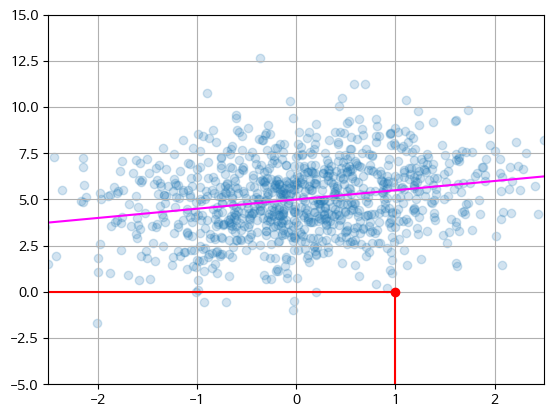

In [38]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], 
             [xmin*slope+intercept, xmax*slope+intercept], 
             **kargs)

x = np.random.randn(1000)
y = 0.5*x + 5 + np.random.randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

# 히스토그램

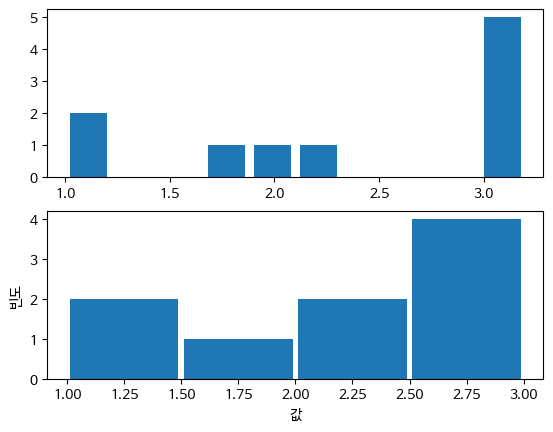

In [39]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("값")
plt.ylabel("빈도")

plt.show()

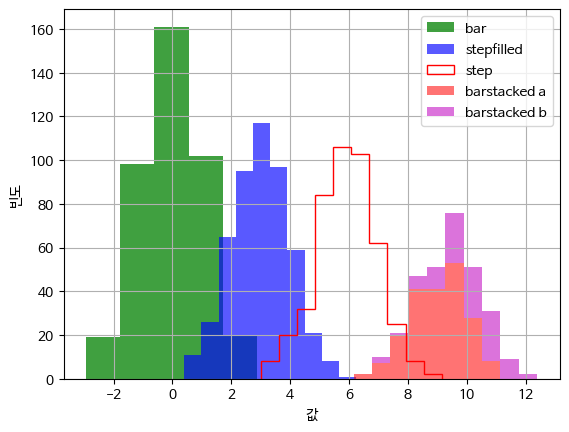

In [40]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar') # histtype의 기본값은 'bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled')
plt.hist(data3, color='r', histtype='step', label='step')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', 
         label=('barstacked a', 'barstacked b'))

plt.xlabel("값")
plt.ylabel("빈도")
plt.legend()
plt.grid(True)
plt.show()

# 이미지

맷플롯립에서의 이미지 불러오기, 생성하기, 화면에 그리기는 꽤 간단합니다.

이미지를 불러오려면 `matplotlib.image` 모듈을 임포트하고, 파일이름을 지정한 `imread` 함수를 호출해 주면 됩니다. 그러면 이미지 데이터가 NumPy의 배열로서 반환됩니다. 앞서 저장했던 `my_square_function.png` 이미지에 대하여 이를 수행해 보겠습니다.

In [41]:
import matplotlib.image as mpimg

img = mpimg.imread('my_square_function.png')
print(img.shape, img.dtype)

(480, 640, 4) float32


288x432 크기의 이미지를 불러왔습니다. 각 픽셀은 0~1 사이의 32비트 부동소수 값인 4개의 요소(빨강, 초록, 파랑, 투명도)로 구성된 배열로 표현됩니다. 이번에는 `imshow`함수를 호출해 보겠습니다:

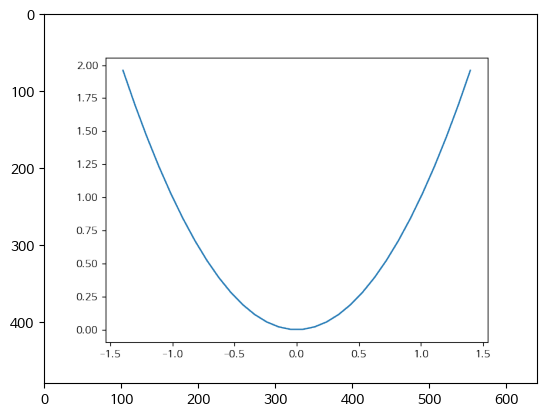

In [42]:
plt.imshow(img)
plt.show()

이미지 출력에 포함된 축을 숨기고 싶다면 아래와 같이 축을 off 시켜줄 수 있습니다:

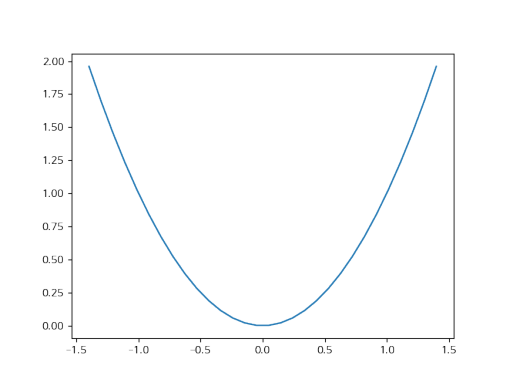

In [43]:
plt.imshow(img)
plt.axis('off')
plt.show()

내부적으로 `imread()`는 파이썬 이미지 라이브러리(PIL)를 사용하며, 맷플롯립 문서는 PIL을 직접 사용할 것을 권장합니다:

In [44]:
import PIL

img = np.asarray(PIL.Image.open("my_square_function.png"))
print(img.shape, img.dtype)

(480, 640, 4) uint8


이 배열은 부호가 없는 8비트 정수(0~255)를 포함하고 있지만 `plt.imshow()`가 이 형식도 지원하므로 괜찮습니다:

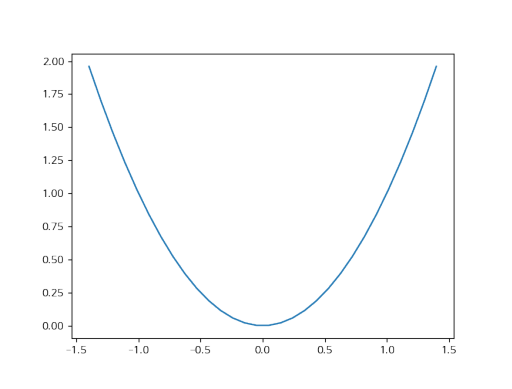

In [45]:
plt.imshow(img)
plt.axis('off')
plt.show()

여러분 만의 이미지를 생성하는것도 마찬가지로 간단합니다:

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


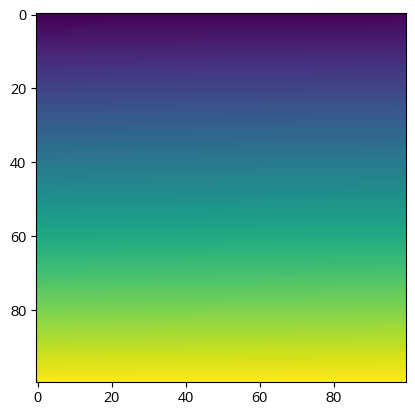

In [46]:
img = np.arange(100*100).reshape(100, 100)
print(img)
plt.imshow(img)
plt.show()

RGB 수준을 제공하지 않는다면, `imshow` 함수는 자동으로 값을 색그래디언트에 매핑합니다. 기본적인 동작에서의 색그래디언트는 파랑(낮은 값) 에서 빨강(높은 값)으로 움직입니다. 하지만 아래와 같이 다른 색상맵을 선택할 수도 있습니다:

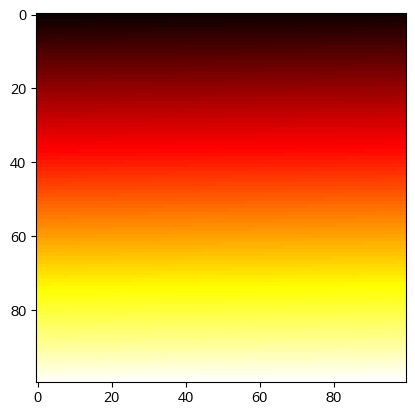

In [47]:
plt.imshow(img, cmap="hot")
plt.show()

RGB 이미지를 직접적으로 생성하는것 또한 가능합니다:

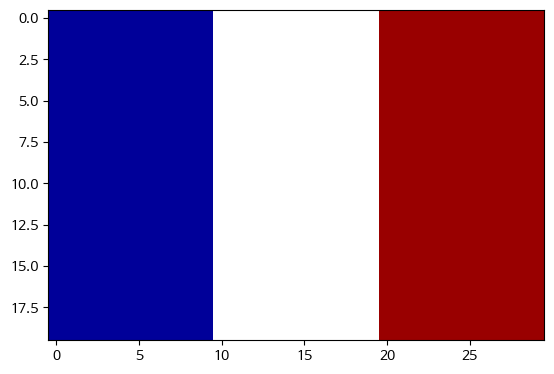

In [48]:
img = np.empty((20,30,3))
img[:, :10] = [0, 0, 0.6]
img[:, 10:20] = [1, 1, 1]
img[:, 20:] = [0.6, 0, 0]
plt.imshow(img)
plt.show()

`img` 배열이 매우 작기 때문에 (20x30), `imshow` 함수는 이미지를 figure 크기에 맞도록 늘려버린채 출력합니다. 원본 이미지를 늘린다고 생각해 보세요. 원본 픽셀 사이에 빈 공간이 생깁니다. imshow는 이 공간을 어떻게 채울까요? 기본적으로 빈 픽셀 주변의 색깔을 사용해 빈 픽셀을 채웁니다. 이런 방법은 픽셀 패턴을 만듭니다. 필요하다면 [쌍선형 보간법(bilinear interpolation)](https://en.wikipedia.org/wiki/Bilinear_interpolation)와 같은 다른 보간 방법을 사용할 수 있습니다. 이 방식은 경계를 흐리게 만들어 일부 경우 더 좋은 이미지를 만듭니다:

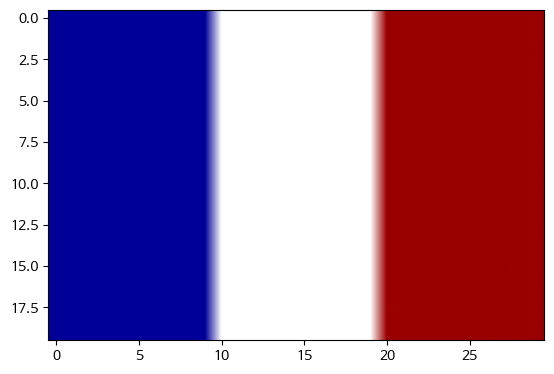

In [49]:
plt.imshow(img, interpolation="bilinear")
plt.show()

# 애니메이션

맷플롯립은 이미지 생성에 주로 사용되지만, 애니메이션의 출력도 가능합니다. 우선 `matplotlib.animation`을 임포트해야 합니다.

In [50]:
import matplotlib.animation as animation

다음의 예는 데이터를 생성하는것으로 시작됩니다. 그 다음, 빈 그래프를 생성하고, 애니메이션을 그릴 매 프레임 마다 호출될 갱신(update) 함수를 정의합니다. 마지막으로, `FuncAnimation` 인스턴스를 생성하여 그래프에 애니메이션을 추가합니다.

`FuncAnimation` 생성자는 figure, 갱신 함수, 그 외의 파라미터를 수용합니다. 각 프레임간 100ms의 시간차가 있는 50개의 프레임으로 구성된 애니메이션에 대한 인스턴스를 만들었습니다. 애니메이션의 각 프레임마다 `FuncAnimation` 는 갱신 함수를 호출하고, 프레임 번호를 `num` (이 예에서는 0~99의 범위) 으로서 전달해 줍니다. 또한 갱신 함수의 추가적인 두 파라미터는 FuncAnimation 생성시 `fargs`에 넣어준 값이 됩니다.

작성한 갱신 함수는 선을 구성하는 데이터를 0 ~ `num` 데이터로 설정합니다 (따라서 데이터가 점진적으로 그려집니다). 그리고 약간의 재미 요소를 위해서, 각 데이터에 약간의 무작위 수를 추가하여 선이 씰룩씰룩 움직이게끔 해 주었습니다.

In [51]:
x = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-") # 빈 그래프에서 시작합니다
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0, 0], [-0.5, 0.5], "b-", 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

# 매 반복마다 이 함수를 호출합니다
def update_line(num, data, line):
    # 처음 `num` 개의 데이터 포인트만 그립니다
    line.set_data(data[..., :num] + np.random.rand(2, num) / 25)
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50, 
                                   fargs=(data, line), interval=100)
plt.close()  # 정적인 그래프를 출력하지 않기 위해 close()를 호출합니다

이제 애니메이션을 출력해 보죠. 출력 방법 하나는 (`<vidoe>` 태그를 사용해) HTML5 코드로 변환하고 `IPython.display.HTML`을 사용해 렌더링하는 것입니다. 

In [52]:
from IPython.display import HTML

HTML(line_ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

또는 HTML/자바스크립트 반응형 위젯을 사용해 이 애니메이션을 출력할 수 있습니다.

In [ ]:
HTML(line_ani.to_jshtml())

애니메이션을 그릴 때 기본적으로 이 위젯을 사용하도록 맷플롯립을 설정할 수 있습니다.

In [ ]:
matplotlib.rc('animation', html='jshtml')

이후에는 `IPython.display.HTML`을 더이상 사용할 필요가 없습니다.

In [ ]:
animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), 
                        interval=100)

**경고:** 이 노트북을 저장하면 애니메이션때문에 노트북 파일 용량이 커집니다.

# 애니메이션을 비디오로 저장
비디오로 저장하기 위해서 Matplotlib은 써드파티 라이브러리([FFMPEG](https://www.ffmpeg.org/) 또는 [ImageMagick](https://imagemagick.org/)에 의존합니다. 다음의 예는 FFMPEG를 사용하기 때문에, 이 라이브러리가 먼저 설치되어 있어야만 합니다. 애니메이션을 GIF로 저장하고 싶다면 ImageMagick이 필요할 것입니다.

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('my_wiggly_animation.mp4', writer=writer)

# 다음은 무엇을 해야할까?
이제 matplotlib의 모든 기본을 습득하셨습니다. 하지만, 그 외에도 수 많은 옵션이 있습니다. 이를 배우기위한 가장 좋은 방법은 [갤러리](http://matplotlib.org/gallery.html) 사이트를 방문하여 흥미로운 그래프를 골라본 다음, 코드를 주피터 노트북에 복사하고 이것저것 가지고 놀아보는 것입니다.